## Using Data to Improve Marketing Promotions


### Taniya Adhikari 04/04/2022

In [145]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.rinterface

import warnings; warnings.simplefilter('ignore')

For this Project We're going to use Dodgers Major League Baseball data from 2012. The purpose of this project is to determine what night would be the best to run a marketing promotion to increase attendance. We will be using different statistical analysis methods to solve this problem such as:

Box plots
Scatter plots
Regression Model

# 1. Data Preparation

## Check data structure

In [146]:
data = pd.read_csv('dodgers.csv')

In [147]:
data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [148]:
# Get the number of rows and columns 
data.shape

(81, 12)

In [149]:
data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [150]:
data.describe(include=['O'])

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Friday,Padres,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


## Check for Missing values

In [151]:
# check for missing value for Each column
def percentMissing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)
    
    # % of missing data
    for col in df.columns:
        # create missing indicator for features with missing data
        missing = df[col].isnull()   # checking null value for each col
        pct_missing = np.mean(missing)*100
        print('{} - {}%'.format(col, round(pct_missing)))

In [152]:
percentMissing(data)

['day' 'attend' 'temp']
month - 0%
day - 0%
attend - 0%
day_of_week - 0%
opponent - 0%
temp - 0%
skies - 0%
day_night - 0%
cap - 0%
shirt - 0%
fireworks - 0%
bobblehead - 0%


## Check for Duplicates

In [153]:
print (data.duplicated(subset=['month','day', 'attend'], keep=False))

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool


### No Missing values or Duplicates. Data is good to proceed for further analysis

# 2. Analysis

## Boxplot by Month

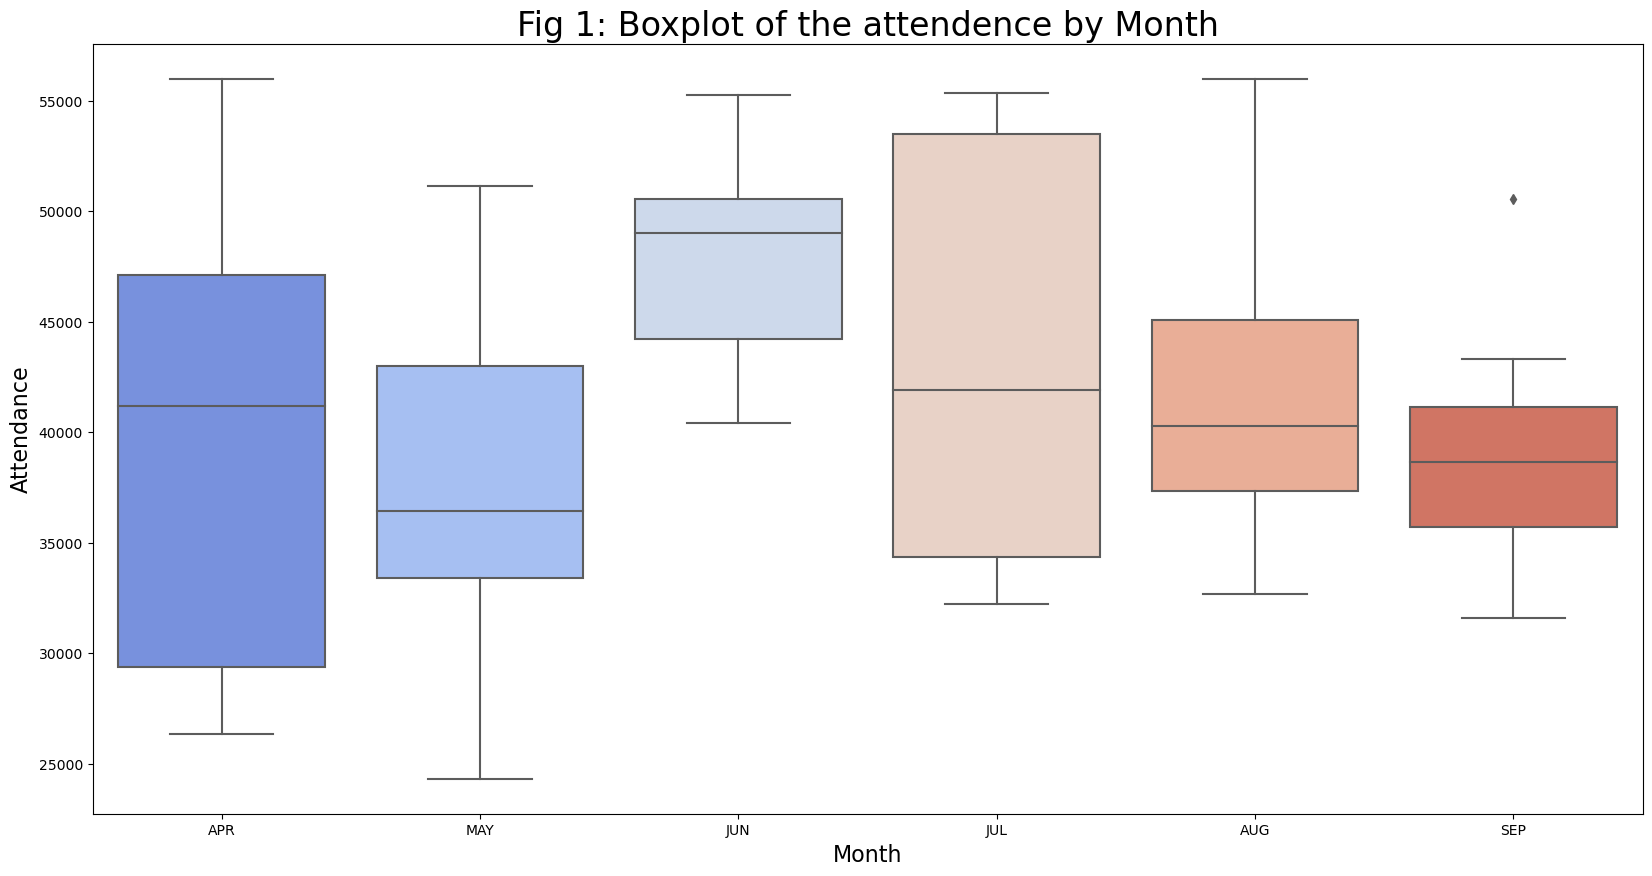

In [248]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

sns.boxplot(y='attend',x='month', palette='coolwarm', data=data, 
            order=['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP']).set_title('Fig 1: Boxplot of the attendence by Month', size=24)
plt.xlabel('Month', size=16)
plt.ylabel('Attendance', size=16)
plt.show()

In [155]:
data.groupby('month').describe()['attend']

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
APR,12.0,39591.916667,10882.001583,26345.0,29378.75,41186.5,47100.00,56000.0
AUG,15.0,42751.533333,7256.695921,32659.0,37353.00,40284.0,45062.50,56000.0
JUL,12.0,43884.250000,9399.324716,32238.0,34340.75,41914.0,53516.00,55359.0
JUN,9.0,47940.444444,4919.203063,40432.0,44217.00,49006.0,50559.00,55279.0
MAY,18.0,37345.722222,7721.822307,24312.0,33413.25,36422.0,43011.25,51137.0
OCT,3.0,36703.666667,5000.193030,33624.0,33819.00,34014.0,38243.50,42473.0
SEP,12.0,38955.083333,5135.247758,31607.0,35717.25,38650.0,41155.25,50560.0


### Based on the Boxplot by month and the data above, it seems like the month of June in general has higher attendance with average attendance 47940, higher than any other month. Additonally the range of the month of June also towards the higher attendance.

## Boxplot by day of the week

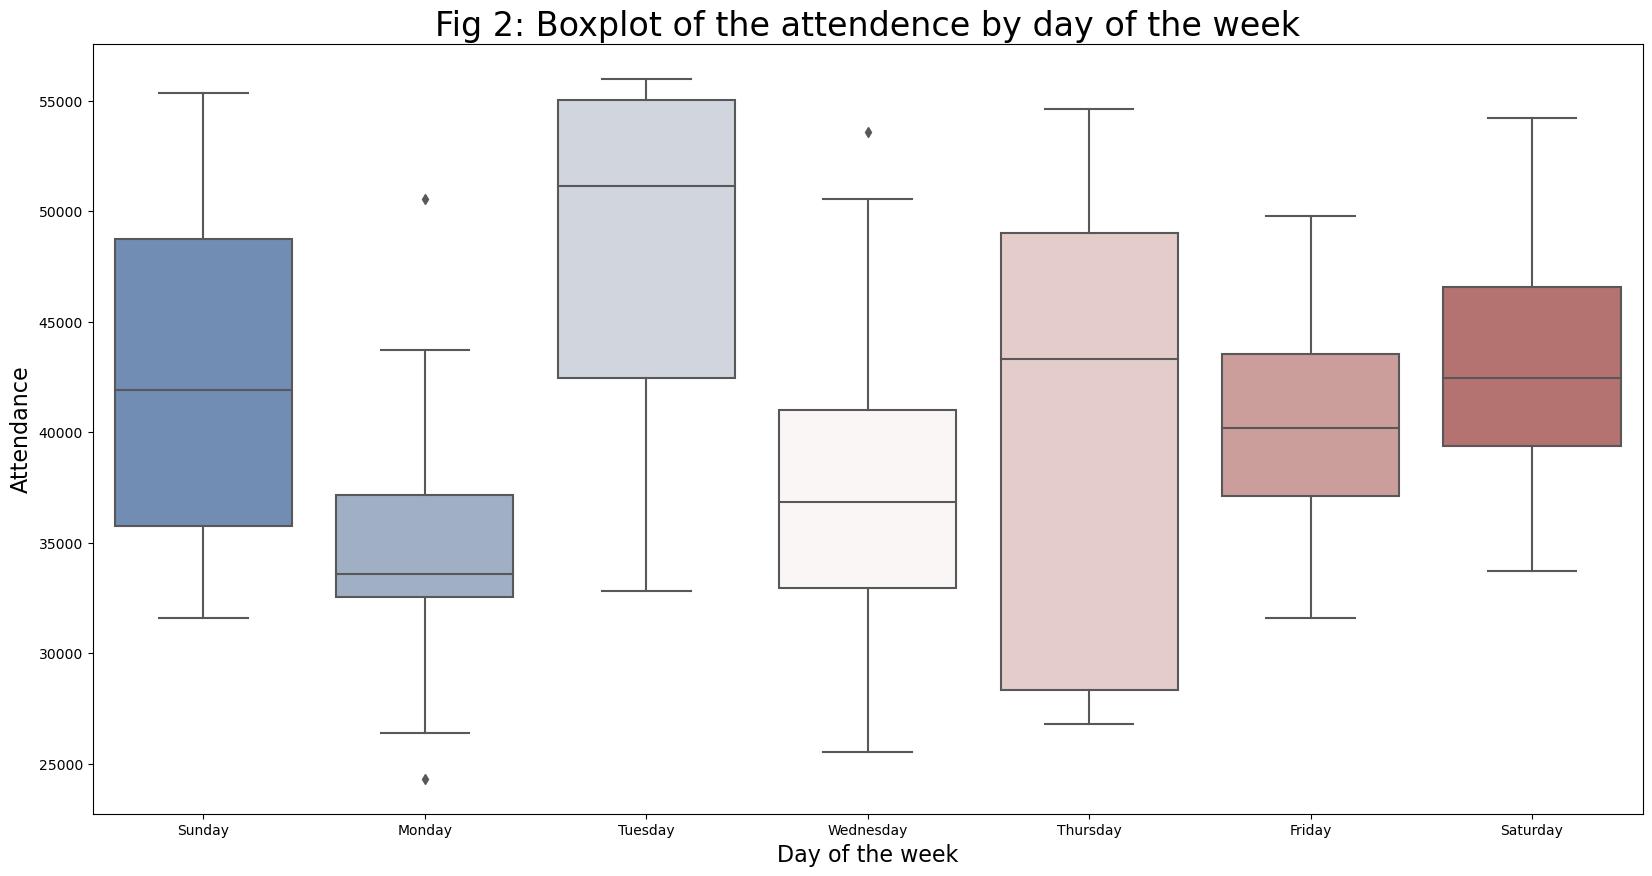

In [250]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

sns.boxplot(y='attend',x='day_of_week', palette='vlag', data=data, 
            order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).set_title('Fig 2: Boxplot of the attendence by day of the week', size=24)
plt.xlabel('Day of the week', size=16)
plt.ylabel('Attendance', size=16)
plt.show()

In [157]:
data.groupby('day_of_week').describe()['attend']

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Friday,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
Monday,12.0,34965.666667,7005.957949,24312.0,32553.75,33582.0,37162.50,50559.0
Saturday,13.0,43072.923077,6336.482298,33735.0,39383.00,42449.0,46549.00,54242.0
Sunday,13.0,42268.846154,7596.350657,31607.0,35754.00,41907.0,48753.00,55359.0
Thursday,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
Tuesday,13.0,47741.230769,8291.390044,32799.0,42473.00,51137.0,55024.00,56000.0
Wednesday,12.0,37585.166667,8696.234889,25509.0,32927.00,36840.0,41003.25,53570.0


### Based on the Boxplot by week and the data above, it seems like the Tuesday in general have higher attendance with average attendance of 47741, higher than any other day. The IQR is also falls towards higher attendance. The maximum attendance is also higher than other days of the week. 

## Boxplot for marketing type

In [228]:
features = ['cap', 'shirt', 'fireworks', 'bobblehead']

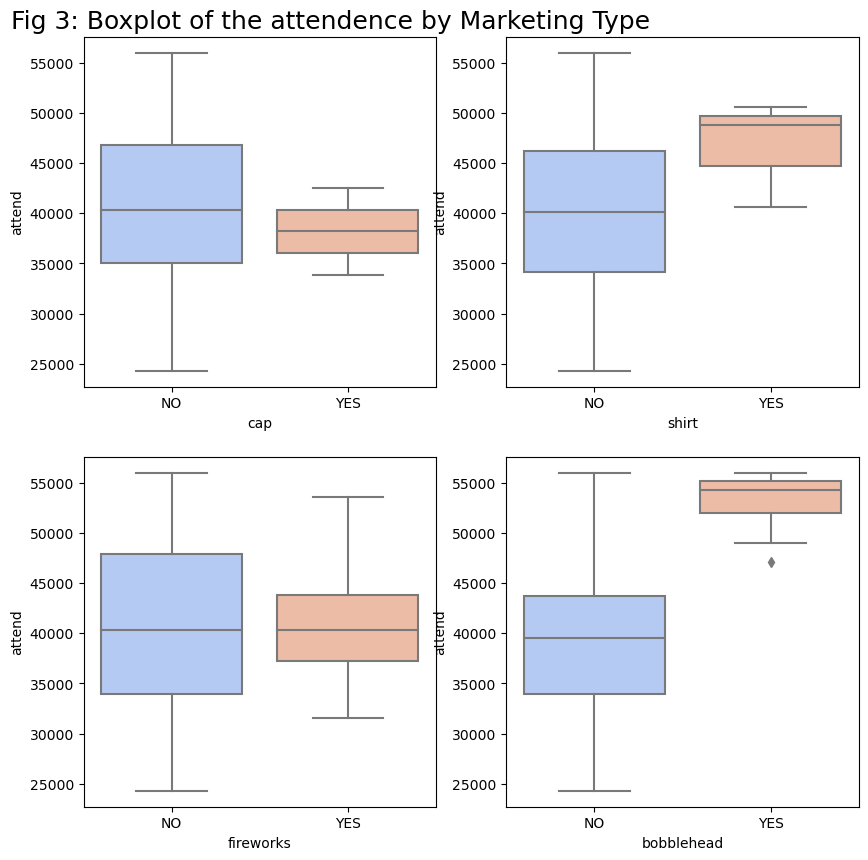

In [266]:
# set figure size
plt.rcParams['figure.figsize'] = (10,10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw boxplots in for loop
axes = axes.ravel()

for idx, col in enumerate(features):
    # seaborn library 
    sns.boxplot(y='attend',x=col, data=data,palette='coolwarm', ax=axes[idx])   
plt.title('Fig 3: Boxplot of the attendence by Marketing Type', size=18, y =2.2, x=-0.5)
plt.show()

In [230]:
data.groupby(['day_of_week', 'shirt']).describe()['attend']

count          mean           std      min       25%  \
day_of_week shirt                                                         
Friday      NO      13.0  40116.923077   4694.879400  31601.0  37133.00   
Monday      NO      11.0  33548.090909   5240.812331  24312.0  32448.50   
            YES      1.0  50559.000000           NaN  50559.0  50559.00   
Saturday    NO      13.0  43072.923077   6336.482298  33735.0  39383.00   
Sunday      NO      12.0  41728.500000   7668.747563  31607.0  35717.25   
            YES      1.0  48753.000000           NaN  48753.0  48753.00   
Thursday    NO       5.0  40407.400000  12411.591328  26773.0  28328.00   
Tuesday     NO      12.0  48334.750000   8366.667819  32799.0  43628.75   
            YES      1.0  40619.000000           NaN  40619.0  40619.00   
Wednesday   NO      12.0  37585.166667   8696.234889  25509.0  32927.00   

                       50%       75%      max  
day_of_week shirt                              
Friday      NO     40167.0  43537.00  49763.0  
Monday      NO     33540.0  35685.50  43713.0  
            YES    50559.0  50559.00  50559.0  
Saturday    NO     42449.0  46549.00  54242.0  
Sunday      NO     40811.0  45284.75  55359.0  
            YES    48753.0  48753.00  48753.0  
Thursday    NO     43309.0  49006.00  54621.0  
Tuesday     NO     51984.5  55087.75  56000.0  
            YES    40619.0  40619.00  40619.0  
Wednesday   NO     36840.0  41003.25  53570.0

In [231]:
data.groupby(['day_of_week', 'bobblehead']).describe()['attend']

count          mean          std      min       25%  \
day_of_week bobblehead                                                        
Friday      NO           13.0  40116.923077  4694.879400  31601.0  37133.00   
Monday      NO           12.0  34965.666667  7005.957949  24312.0  32553.75   
Saturday    NO           11.0  41062.909091  4392.208248  33735.0  37972.00   
            YES           2.0  54128.000000   161.220346  54014.0  54071.00   
Sunday      NO           12.0  41178.000000  6787.843733  31607.0  35717.25   
            YES           1.0  55359.000000          NaN  55359.0  55359.00   
Thursday    NO            3.0  32803.333333  9131.335079  26773.0  27550.50   
            YES           2.0  51813.500000  3970.404576  49006.0  50409.75   
Tuesday     NO            7.0  43326.714286  8875.037572  32799.0  37251.50   
            YES           6.0  52891.500000  3370.480841  47077.0  51560.75   
Wednesday   NO           12.0  37585.166667  8696.234889  25509.0  32927.00   

                            50%       75%      max  
day_of_week bobblehead                              
Friday      NO          40167.0  43537.00  49763.0  
Monday      NO          33582.0  37162.50  50559.0  
Saturday    NO          40724.0  44713.50  46588.0  
            YES         54128.0  54185.00  54242.0  
Sunday      NO          40811.0  45192.00  53504.0  
            YES         55359.0  55359.00  55359.0  
Thursday    NO          28328.0  35818.50  43309.0  
            YES         51813.5  53217.25  54621.0  
Tuesday     NO          42473.0  48756.00  56000.0  
            YES         53928.0  55215.25  56000.0  
Wednesday   NO          36840.0  41003.25  53570.0

### Further analysis of other variables shows, that the use of bobblehead and shirt for marketing, seems to show some significance on the attendance. Above comparison also shows that the attendance was significantly higher with the use of bobblehead vs. when it was not used for specific days.

## Boxplot for marketing type For Only Tuesday

In [273]:
df2 = data[data['day_of_week'] =="Tuesday"] 

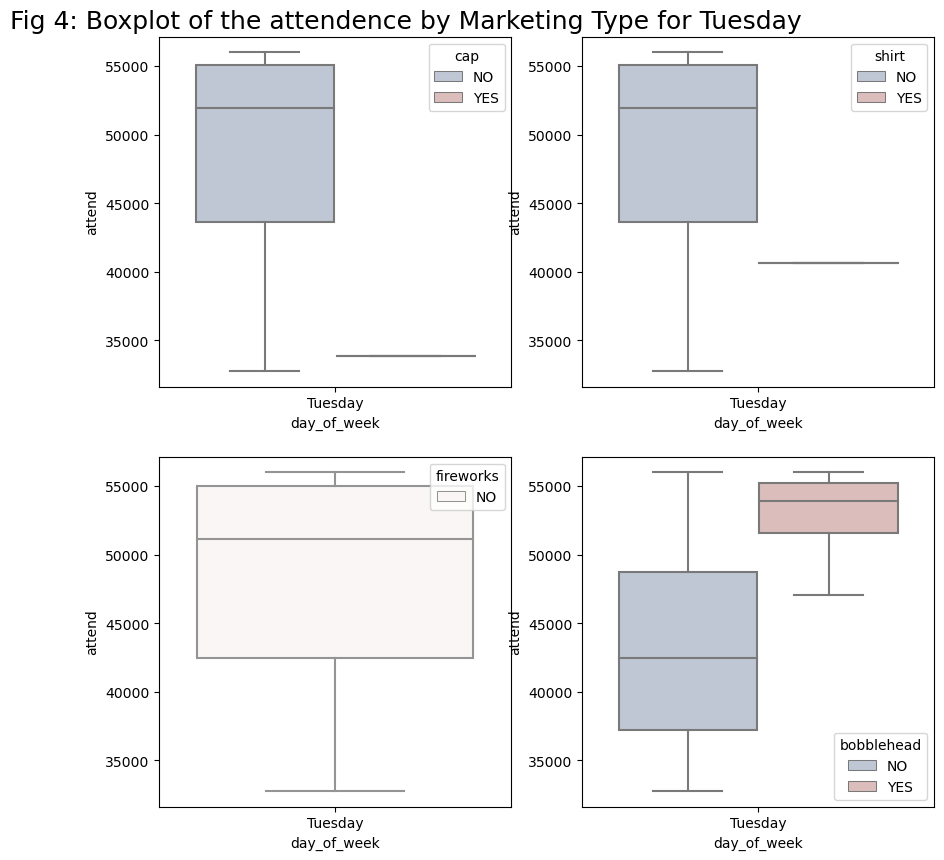

In [274]:
features = ['cap', 'shirt', 'fireworks', 'bobblehead']

# set figure size
plt.rcParams['figure.figsize'] = (10,10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw boxplots in for loop
axes = axes.ravel()
for idx, col in enumerate(features):
    # seaborn library 
    sns.boxplot(y='attend',x='day_of_week', data=df2, hue=col, ax=axes[idx], palette='vlag')

plt.title('Fig 4: Boxplot of the attendence by Marketing Type for Tuesday', size=18, y =2.2, x=-0.5)    
plt.show()

### Although bobblehead shows that the attendance is increased, Tuesday's maximum attendance during the days when no marketing done also has higher attendance 

## Linechart

In [234]:
df = pd.DataFrame(data.groupby(['month','day_of_week']).mean()['attend'])
df.head()

attend
month day_of_week         
APR   Friday       38204.0
      Monday       26376.0
      Saturday     50395.5
      Sunday       43556.0
      Thursday     28328.0

In [235]:
df = df.reset_index()
df.head(7)

,month,day_of_week,attend
0,APR,Friday,38204.0
1,APR,Monday,26376.0
2,APR,Saturday,50395.5
3,APR,Sunday,43556.0
4,APR,Thursday,28328.0
5,APR,Tuesday,50007.0
6,APR,Wednesday,28037.0


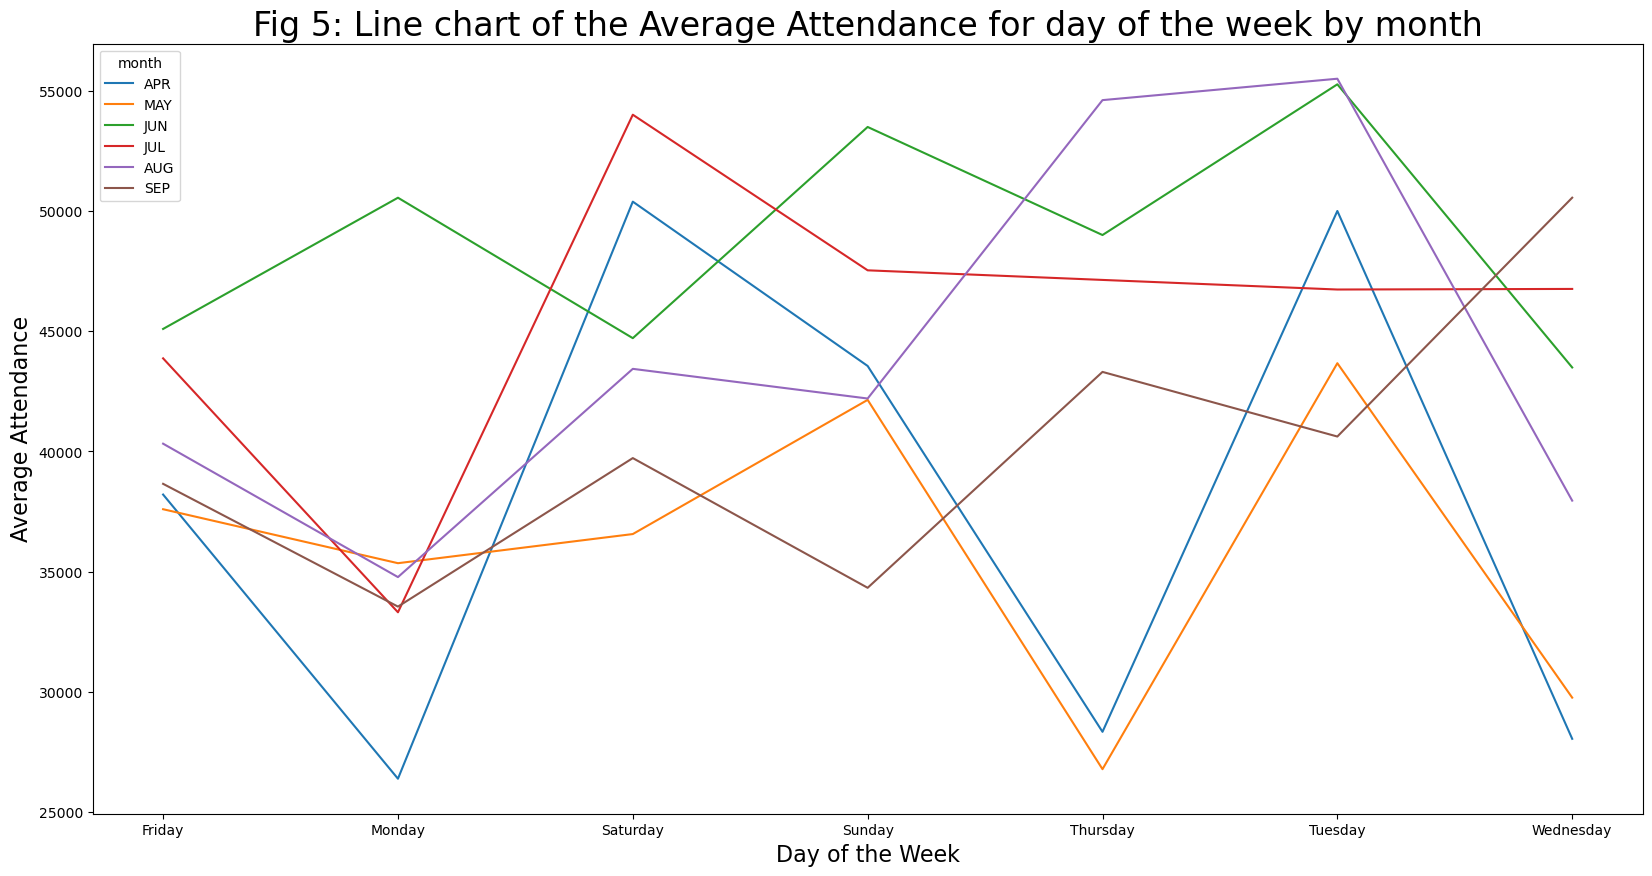

In [270]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

sns.lineplot(y='attend',x='day_of_week', hue='month', hue_order=['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'], 
             data=df).set_title('Fig 5: Line chart of the Average Attendance for day of the week by month', size=24)
plt.xlabel('Day of the Week', size=16)
plt.ylabel('Average Attendance', size=16)
plt.show()

### Saturdays and Tuesdays seems to have higher average attendance

## Scatterplot

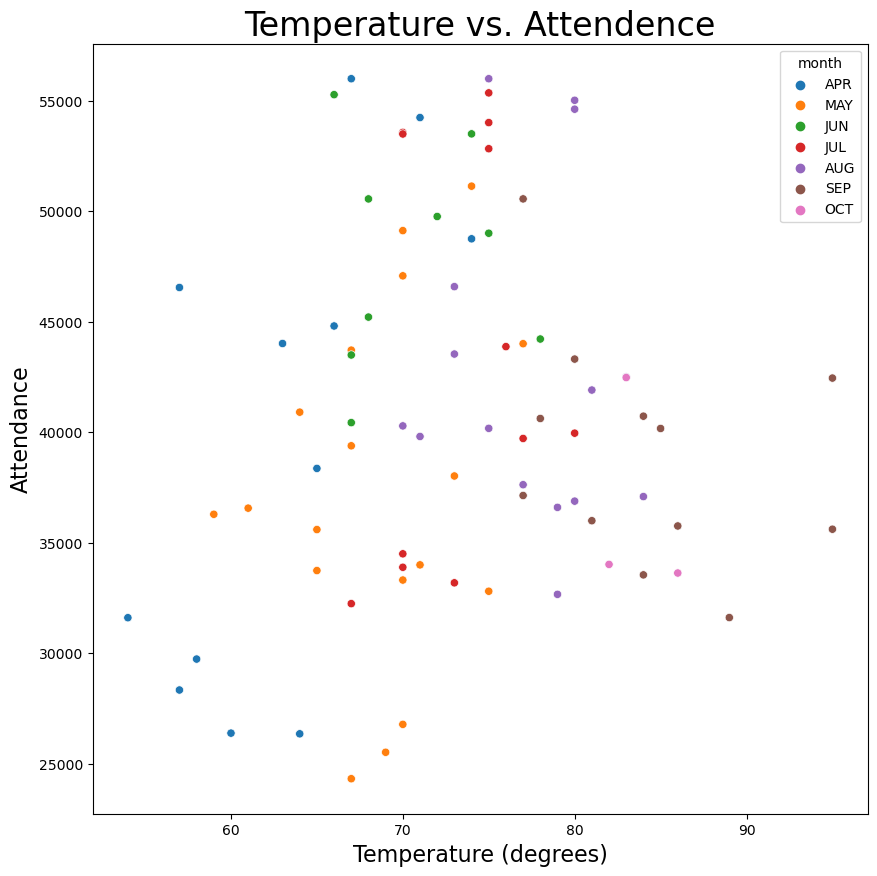

In [272]:
# set figure size
plt.rcParams['figure.figsize'] = (10,10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

sns.scatterplot(y='attend',x='temp', hue='month', 
             data=data).set_title('Temperature vs. Attendence', size=24)
plt.xlabel('Temperature (degrees)', size=16)
plt.ylabel('Attendance', size=16)
plt.show()

### Scatterplot between Attendance and Temperature is quite dispersed, however, most data points do fall between 70 Degrees to 80 Degrees

## Regression Analysis

In [238]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [239]:
%%R -i data

UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


### Model 1

In [240]:
%%R -o model1 -o coef1 -o pVal1 -o mPVal1

model1 <- lm(attend ~ month + day_of_week, data)
coef1 <- model1$coefficients
pVal1 <- summary(model1)$coefficients[,4]
lmp <- function (modelobject) {
    if (class(modelobject) != "lm") stop("Not an object of class 'lm' ")
    f <- summary(modelobject)$fstatistic
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    return(p)
}

mPVal1 <- lmp(model1)

In [241]:
print(coef1)

         (Intercept)             monthAUG             monthJUL 

          38046.5420            3965.9784            4768.3867 

            monthJUN             monthMAY             monthOCT 

           8753.4054           -1957.7296           -1500.1929 

            monthSEP    day_of_weekMonday  day_of_weekSaturday 

           -692.4947           -4991.2625            3314.3441 

   day_of_weekSunday  day_of_weekThursday   day_of_weekTuesday 

           2816.8071             347.0261            7931.2545 

day_of_weekWednesday 

          -2468.0392 



In [242]:
print("The Model P-Value is: {}". format(mPVal1))

The Model P-Value is: [1] 0.0001280101



In [243]:
print(pVal1)

         (Intercept)             monthAUG             monthJUL 

        3.623054e-22         1.437577e-01         1.010857e-01 

            monthJUN             monthMAY             monthOCT 

        5.573453e-03         4.512052e-01         7.432708e-01 

            monthSEP    day_of_weekMonday  day_of_weekSaturday 

        8.080585e-01         8.191309e-02         2.267693e-01 

   day_of_weekSunday  day_of_weekThursday   day_of_weekTuesday 

        3.053850e-01         9.243929e-01         5.447102e-03 

day_of_weekWednesday 

        3.820330e-01 



### Model 2

In [244]:
%%R -o model2 -o coef2 -o pVal2 -o mPVal2

model2 <- lm(attend ~ month + day_of_week + opponent + temp + bobblehead, data)
coef2 <- model2$coefficients
pVal2 <- summary(model2)$coefficients[,4]
lmp <- function (modelobject) {
    if (class(modelobject) != "lm") stop("Not an object of class 'lm' ")
    f <- summary(modelobject)$fstatistic
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    return(p)
}

mPVal2 <- lmp(model2)

In [245]:
print(coef2)

         (Intercept)             monthAUG             monthJUL 

         38583.61659           5898.34553           3784.43355 

            monthJUN             monthMAY             monthOCT 

          4315.69019           2044.88263           1277.49745 

            monthSEP    day_of_weekMonday  day_of_weekSaturday 

          1476.46877          -3109.88304           1610.53802 

   day_of_weekSunday  day_of_weekThursday   day_of_weekTuesday 

          1354.27886          -2201.09845           5052.27516 

day_of_weekWednesday       opponentAstros       opponentBraves 

         -1021.00958          -9288.88100          -9652.94310 

     opponentBrewers    opponentCardinals         opponentCubs 

        -10903.17599          -3801.20836          -4946.18042 

      opponentGiants      opponentMarlins         opponentMets 

         -7500.97568          -8374.94480          -1997.30302 

   opponentNationals       opponentPadres     opponentPhillies 

          2963.73263     

In [246]:
print("The Model P-Value is: {}". format(mPVal2))

The Model P-Value is: [1] 0.0004450911



In [247]:
print(pVal2)

         (Intercept)             monthAUG             monthJUL 

         0.009566859          0.453035217          0.558085956 

            monthJUN             monthMAY             monthOCT 

         0.701423343          0.737150657          0.891562126 

            monthSEP    day_of_weekMonday  day_of_weekSaturday 

         0.849806201          0.366513599          0.544591218 

   day_of_weekSunday  day_of_weekThursday   day_of_weekTuesday 

         0.689301088          0.596075661          0.190606300 

day_of_weekWednesday       opponentAstros       opponentBraves 

         0.776078399          0.411593363          0.426493747 

     opponentBrewers    opponentCardinals         opponentCubs 

         0.357323588          0.737858874          0.672814153 

      opponentGiants      opponentMarlins         opponentMets 

         0.498988182          0.469376594          0.750834289 

   opponentNationals       opponentPadres     opponentPhillies 

         0.813027403     

# 3. Summary

## Key Insights
### 1. Fig 1 and Fig 2 showed that the month of June was consistently had higher attendance, July also had higher attendance but it was not consistent. Tuesdays Usually seem to show higher attendance.  
### 2. Fig 3 shows use of bobbleheads and shirts for marketing significantly increases attendance.
### 3. Fig 4 indicate that Tuesday's attendance increase may be due to bobblehead marketing. Need more data for further investigation.
### 4. Fig 5 indicates Tuesdays in the Month of August had highest average of attendance.

## Conclusion
### I built two multiple linear regression using R interface. The first one only had month and day_of_week as independant variable, second one had more variables such as opponent, temp and bobblehead. Model 1 shows all variables were significant whereas model 2 had lot of non-significant variables. Overall model 1 had lower p-value  (p-value = 0.0001) compare to model 2 (p-value = 0.0004), indicating model 1 probably a better predictor. 

### Based on my visuals I would recommend Tuesdays in the month of June is good for marketing promotions, however tuesdays were in general had higher attendance but June was consistently higher in other week days as well.  However, this analysis is limited, because data is limited, we don't know for sure if Tuesday's attendance increase is due to game schedule and opponent or because it was use of bobblehead. To make better decisions on marketing, finding the effect of promotional items are also important. Further analysis and more data is required to make any kind of significant recommendation. 